In [ ]:
#Python-ի գրադարաններից կանչում ենք,այն կոդերը որոնք անհրաժեշտ են մեր վերլուծության համար։

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [ ]:
Data=pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
Data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#Ջնջում ենք duplicate-ները
Data.drop_duplicates()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [ ]:
Data.columns.tolist()

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
Data.groupby(['Sex','Race']).aggregate({'BMI':'mean'})

BMI
Sex    Race                                     
Female American Indian/Alaskan Native  29.647928
       Asian                           24.474645
       Black                           31.014074
       Hispanic                        28.852188
       Other                           28.761031
       White                           27.834257
Male   American Indian/Alaskan Native  29.604091
       Asian                           25.910699
       Black                           28.946770
       Hispanic                        28.779536
       Other                           28.736832
       White                           28.499127

In [ ]:
Data.pivot_table(index='Smoking', columns='AgeCategory', values='BMI', aggfunc='mean', fill_value=0).reset_index()

AgeCategory,Smoking,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
0,No,25.679394,27.572566,28.310005,28.596746,29.012533,29.340173,29.336677,29.121432,28.897924,28.745327,28.226548,27.633073,26.114688
1,Yes,26.214178,27.954315,28.649929,29.171936,29.445633,29.707350,29.561713,29.068702,28.731750,28.590512,28.120911,27.562276,26.351059


In [ ]:
Data['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [ ]:
Data['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [ ]:
Data['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [ ]:
Data.PhysicalHealth.max()

30

In [ ]:
Data.PhysicalHealth.min()

0

In [ ]:
Data.PhysicalHealth.mean()

3.3717100017198516

In [ ]:
Data.MentalHealth.min()

0

In [ ]:
Data.MentalHealth.max()

30

In [ ]:
Data.MentalHealth.mean()

3.898366140808956

In [ ]:
Data.BMI.max()

94.85

In [ ]:
Data.BMI.min()

12.02

In [ ]:
Data.BMI.median()

27.34

In [ ]:
Data.SleepTime.min()

1

In [ ]:
Data.SleepTime.max()

24

In [ ]:
Data.SleepTime.mean()

7.097074688472302

In [ ]:
Data['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [ ]:
Data.isnull().count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [ ]:
Data.fillna('unknow')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [ ]:
#Ստանում ենք ընդհանուր վիճակագրական տվյալներ
Data.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [ ]:
#Ստուգում ենք մեր փոփոխականների միջև կոռելացվածությունը(կախվածությունը)
Data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


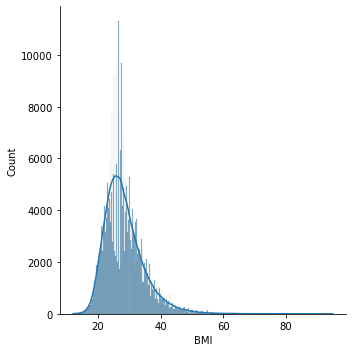

In [ ]:
# Ըստ BMI-ի ինչպես է բաշխված մեր տվյալները
sns.displot(Data['BMI'], kde=True)

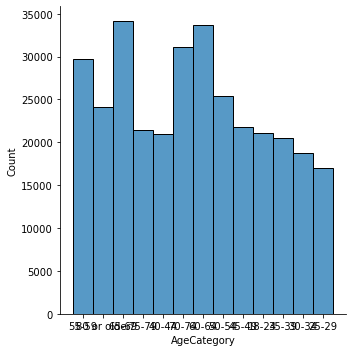

In [ ]:
sns.displot(Data['AgeCategory'], kde=False)

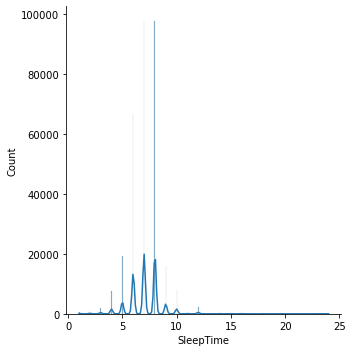

In [ ]:
sns.displot(Data['SleepTime'], kde=True)

In [ ]:
plt.bar(Data['MentalHealth'],Data['PhysicalHealth'])

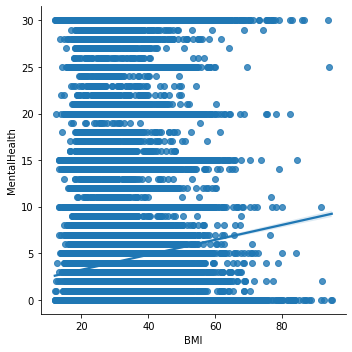

In [ ]:
sns.lmplot(x='BMI', y='MentalHealth', data=Data)

In [ ]:
def aaa (Data):
    if Data.Sex=='Female':
        return "0"
    elif Data.Sex=='Male':
        return "1"


# Նոր սյան ստեղծում
Data['sex']=Data.apply(aaa, axis=1)

In [ ]:
def bbb (Data):
    if Data.AlcoholDrinking=='Yes':
        return "1"
    elif Data.AlcoholDrinking=='No':
        return "0"



Data['Alcohol_Drinking']=Data.apply(bbb, axis=1)

In [ ]:
def c (Data):
    if Data.Smoking=='Yes':
        return "1"
    elif Data.Smoking=='No':
        return "0"



Data['smoking']=Data.apply(c, axis=1)

In [ ]:
def e (Data):
    if Data.HeartDisease=='Yes':
        return "1"
    elif Data.HeartDisease=='No':
        return "0"



Data['Heartdisease']=Data.apply(e, axis=1)

In [ ]:
def a (Data):
    if Data.Stroke=='Yes':
        return "1"
    elif Data.Stroke=='No':
        return "0"


Data['stroke']=Data.apply(a, axis=1)

In [ ]:
def b (Data):
    if Data.DiffWalking=='Yes':
        return "1"
    elif Data.DiffWalking=='No':
        return "0"


# Նոր սյան ստեղծում
Data['Diffwalking']=Data.apply(b, axis=1)

In [ ]:
def aa (Data):
    if Data.Diabetic=='Yes':
        return "1"
    elif Data.Diabetic=='No':
        return "0"
    elif Data.Diabetic=='No, borderline diabetes':
        return "0"
    elif Data.Diabetic=='Yes (during pregnancy)':
        return "1"



Data['diabetic']=Data.apply(aa, axis=1)

In [ ]:
def bb (Data):
    if Data.PhysicalActivity=='Yes':
        return "1"
    elif Data.PhysicalActivity=='No':
        return "0"



Data['Physicalactivity']=Data.apply(bb, axis=1)

In [ ]:
def cc (Data):
    if Data.Asthma=='Yes':
        return "1"
    elif Data.Asthma=='No':
        return "0"



Data['asthma']=Data.apply(cc, axis=1)

In [ ]:
def ccc (Data):
    if Data.KidneyDisease=='Yes':
        return "1"
    elif Data.KidneyDisease=='No':
        return "0"



Data['Kidneydisease']=Data.apply(ccc, axis=1)

In [ ]:
def d (Data):
    if Data.SkinCancer=='Yes':
        return "1"
    elif Data.SkinCancer=='No':
        return "0"



Data['Skincancer']=Data.apply(d, axis=1)

In [ ]:
Data=Data.drop(['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'],axis=1) #ջնջում ենք սյուները

In [ ]:
Data

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,sex,Alcohol_Drinking,smoking,Heartdisease,stroke,Diffwalking,diabetic,Physicalactivity,asthma,Kidneydisease,Skincancer
0,16.60,3.0,30.0,55-59,White,Very good,5.0,0,0,1,0,0,0,1,1,1,0,1
1,20.34,0.0,0.0,80 or older,White,Very good,7.0,0,0,0,0,1,0,0,1,0,0,0
2,26.58,20.0,30.0,65-69,White,Fair,8.0,1,0,1,0,0,0,1,1,1,0,0
3,24.21,0.0,0.0,75-79,White,Good,6.0,0,0,0,0,0,0,0,0,0,0,1
4,23.71,28.0,0.0,40-44,White,Very good,8.0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,60-64,Hispanic,Fair,6.0,1,0,1,1,0,1,1,0,1,0,0
319791,29.84,0.0,0.0,35-39,Hispanic,Very good,5.0,1,0,1,0,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,45-49,Hispanic,Good,6.0,0,0,0,0,0,0,0,1,0,0,0
319793,32.81,0.0,0.0,25-29,Hispanic,Good,12.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def abc (Data):
    if Data.AgeCategory>='18-24' and Data.AgeCategory<='50-54':
        return "1" #մինչև 54 տարեկան
    elif Data.AgeCategory>='55-59' and Data.AgeCategory<='80 or older':
        return "0" #55-ից բարձր տարիք ունեցողներ

Data['Agecategory']=Data.apply(abc, axis=1)


In [ ]:
def f (Data):
    if Data.GenHealth=='Very good':
        return "1"
    elif Data.GenHealth=='Good':
        return "2"
    elif Data.GenHealth=='Excellent':
        return '3'
    elif Data.GenHealth=='Fair':
        return '4'
    elif Data.GenHealth=='Poor':
        return '5'



Data['Genhealth']=Data.apply(f, axis=1)

In [ ]:
def f (Data):
    if Data.Race=='White':
        return "1"
    elif Data.Race=='Hispanic':
        return "2"
    elif Data.Race=='Black':
        return '3'
    elif Data.Race=='Asian':
        return '4'
    elif Data.Race=='American Indian/Alaskan Native':
        return '5'
    elif Data.Race=='Other':
        return '6'



Data['race']=Data.apply(f, axis=1)

In [ ]:
Data=Data.drop(['AgeCategory','Race','GenHealth'],axis=1)

In [ ]:
Data

,BMI,PhysicalHealth,MentalHealth,SleepTime,sex,Alcohol_Drinking,smoking,Heartdisease,stroke,Diffwalking,diabetic,Physicalactivity,asthma,Kidneydisease,Skincancer,Agecategory,Genhealth,race
0,16.60,3.0,30.0,5.0,0,0,1,0,0,0,1,1,1,0,1,0,1,1
1,20.34,0.0,0.0,7.0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
2,26.58,20.0,30.0,8.0,1,0,1,0,0,0,1,1,1,0,0,0,4,1
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,0,0,0,0,1,0,2,1
4,23.71,28.0,0.0,8.0,0,0,0,0,0,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,0,1,1,0,1,1,0,1,0,0,0,4,2
319791,29.84,0.0,0.0,5.0,1,0,1,0,0,0,0,1,1,0,0,1,1,2
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,0,1,0,0,0,1,2,2
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,0,0,0,0,0,1,2,2


In [ ]:
Data=Data[['BMI','PhysicalHealth','MentalHealth','SleepTime','sex', 'Alcohol_Drinking','smoking','Heartdisease','stroke','Diffwalking','diabetic','Physicalactivity','asthma','Kidneydisease','Skincancer','Agecategory','Genhealth','race']].astype(float)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   PhysicalHealth    319795 non-null  float64
 2   MentalHealth      319795 non-null  float64
 3   SleepTime         319795 non-null  float64
 4   sex               319795 non-null  float64
 5   Alcohol_Drinking  319795 non-null  float64
 6   smoking           319795 non-null  float64
 7   Heartdisease      319795 non-null  float64
 8   stroke            319795 non-null  float64
 9   Diffwalking       319795 non-null  float64
 10  diabetic          319795 non-null  float64
 11  Physicalactivity  319795 non-null  float64
 12  asthma            319795 non-null  float64
 13  Kidneydisease     319795 non-null  float64
 14  Skincancer        319795 non-null  float64
 15  Agecategory       319795 non-null  float64
 16  Genhealth         31

In [ ]:
# Մոդելի համար անկախ փոփոխականների ընտրում
X_data=Data[['BMI','SleepTime','sex','Alcohol_Drinking','smoking','stroke','Diffwalking','diabetic','Physicalactivity','asthma','Kidneydisease','Skincancer','Agecategory','Genhealth','race']]

In [ ]:
Y_data=Data.Heartdisease

In [ ]:
# Dataset-ի բաժանում ուսուցման (70%) և թեստավորման (30%) ընտրանքների
x_train, x_test, y_train, y_test=train_test_split(X_data,Y_data, test_size=0.3)

In [ ]:
# Լոգիստիկ ռեգրեսիայի մոդելի ստեղծում
clf = LogisticRegression()

In [ ]:
# Լոգիստիկ ռեգրեսիայի մոդելի ուսուցում
clf.fit(x_train,y_train)

c:\users\poncho\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.score(x_train,y_train)

0.9154322421556715

In [ ]:
clf.score(x_test,y_test)

0.9157902417160905